In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle, analysis as ana
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

In [2]:
from matplotlib import rc
rc('text', usetex=True)

In [3]:
#fltr='cinv'
#ytype='nilc'
#mtype=0
#dtype='dr2_smica'
#cmask='Lmask'
form='{:.2f}'
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
#p = prjlib.init_analysis(dtype=dtype,fltr=fltr,wtype=cmask)
#qobj = {}
#qobj['normal'], __, __, qobj['lens'], qobj['lens-src'] = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
#cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.0)

chi: -2.9 , chi (sim mean): 0.0 , chi (sim std): 3.6 , PTE: 0.34 
chi^2: 14.8 , chi^2 (sim): 11.2 , PTE: 0.19 


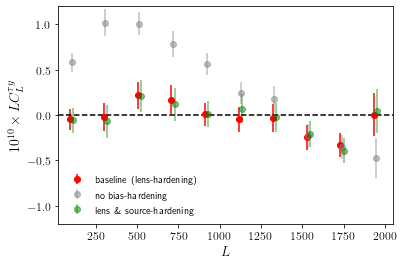

In [4]:
pl.plot_1dstyle(ymin=-1.2,ymax=1.2,ylab=r'$10^{10}\times LC_L^{\tau y}$',usetex=True,yticks=[-1.,-.5,0.,.5,1.],yticks_labsize=12,xticks_labsize=12)
s = 1e10*mb.bc
for i, (bh, Lab, co, alpha) in enumerate([(['lens'],r'baseline (lens-hardening)','r',1.),(None,r'no bias-hardening','grey',.5),(['lens','src'],r'lens \& source-hardening','g',.5)]):
    mcb, vcb, scb, ocb = tools_y.load_binned_ty(mb,bhe=bh)
    errorbar(mb.bc+i*10-10,s*ocb,yerr=s*vcb,fmt='o',color=co,alpha=alpha,label=Lab)
axhline(0.,color='k',ls='--')
st = ana.PTEs(ocb,scb,x1pte=True)
#figtext(.2,.20,r'ymap:'+ytype+','+str(mtype))
#figtext(.2,.25,r'tau:'+dtype+','+str(cmask))
#figtext(.2,.35,r'$\chi$-PTE:'+str(form.format(st.px1)))
#figtext(.2,.30,r'$\chi^2$-PTE:'+str(form.format(st.px2)))
legend(loc=3)
#savefig('fig_tauxy_BH.pdf')
show()